In [ ]:
# Libraries used for the project
import requests
from bs4 import BeautifulSoup
import re

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import LabelEncoder

**DATA ACQUISITION**

In [ ]:
# Retrieve website page that contains data to scrape
# Data to gather for the dataset are GDP of Asian Countries from year 2000 to 2019
result = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)#UN_estimates_between_1970_and_1979")

In [ ]:
# Convert retrieved page to lxml document
src = result.content
document = BeautifulSoup(src, 'lxml')

# Get all tables from the web page
tables = document.find_all('table')

# Create a dataframe to store gathered data
columns = ['Country']
columns += [str(year) for year in range(2000, 2020)]
df = pd.DataFrame(columns=columns)

In [ ]:
# Gather data of GDP of Asian countries from year 2000 to 2019 from the web page table
table = tables[3]
# Get all rows in the table
rows = table.find_all('tr')

# Initialize lists for data gathering
lcountry = []
l0 = []
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []
l6 = []
l7 = []
l8 = []
l9 = []

# Retrieve data from tables. Clean data by removing unnecessary marks.
for row in rows[1:]:
  cells = row.find_all(['td', 'th'])
  cells_text = [cell.get_text(strip=True) for cell in cells]
  (country, y2000, y2001, y2002, y2003, y2004, y2005, y2006, y2007, y2008, y2009) = cells_text
  lcountry.append(country)
  l0.append(re.sub(',','', y2000))
  l1.append(re.sub(',','', y2001))
  l2.append(re.sub(',','', y2002))
  l3.append(re.sub(',','', y2003))
  l4.append(re.sub(',','', y2004))
  l5.append(re.sub(',','', y2005))
  l6.append(re.sub(',','', y2006))
  l7.append(re.sub(',','', y2007))
  l8.append(re.sub(',','', y2008))
  l9.append(re.sub(',','', y2009))

# Transfer values to the dataframe
df['Country'] = lcountry
df['2000'] = l0
df['2001'] = l1
df['2002'] = l2
df['2003'] = l3
df['2004'] = l4
df['2005'] = l5
df['2006'] = l6
df['2007'] = l7
df['2008'] = l8
df['2009'] = l9

In [ ]:
# Gather data of GDP of Asian countries from year 2000 to 2019 from the web page table
table = tables[4]
# Get all rows in the table
rows = table.find_all('tr')

# Initialize lists for data gathering
l0 = []
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []
l6 = []
l7 = []
l8 = []
l9 = []

# Retrieve data from tables. Clean data by removing unnecessary marks.
for row in rows[1:]:
  cells = row.find_all(['td', 'th'])
  cells_text = [cell.get_text(strip=True) for cell in cells]
  if cells_text[0] == 'Syria':
    cells_text = [cells_text[0], cells_text[1], '', '', '', '', '', '', '', '', '']
  (country, y2010, y2011, y2012, y2013, y2014, y2015, y2016, y2017, y2018, y2019) = cells_text
  l0.append(re.sub(',','', y2010))
  l1.append(re.sub(',','', y2011))
  l2.append(re.sub(',','', y2012))
  l3.append(re.sub(',','', y2013))
  l4.append(re.sub(',','', y2014))
  l5.append(re.sub(',','', y2015))
  l6.append(re.sub(',','', y2016))
  l7.append(re.sub(',','', y2017))
  l8.append(re.sub(',','', y2018))
  l9.append(re.sub(',','', y2019))

# Transfer values to the dataframe
df['2010'] = l0
df['2011'] = l1
df['2012'] = l2
df['2013'] = l3
df['2014'] = l4
df['2015'] = l5
df['2016'] = l6
df['2017'] = l7
df['2018'] = l8
df['2019'] = l9

# Show first five samples of dataframe
df.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,,,4367,4553,5146,6167,6925,8556,10297,...,15325,17890,20293,20170,20616,20057,18020,18883,18401,18876
1,Albania,3483,3928,4348,5611,7185,8052,8896,10677,12881,...,11937,12899,12324,12784,13246,11389,11862,13053,15157,15399
2,Algeria,54749,54745,56761,67864,85332,103198,117027,134977,171001,...,161207,200020,209059,209755,213810,165979,160034,167498,174868,171673
3,Andorra,1429,1547,1758,2362,2896,3158,3456,3952,4082,...,3446,3625,3189,3193,3267,2789,2895,2993,3217,3155
4,Angola,11166,10930,15286,17813,23552,36971,52381,65266,88539,...,83799,111790,128053,136710,145712,116194,101124,122022,101353,84516


In [ ]:
# Retrieve only Asian countries
asia = ['Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan',
        'China', 'Japan', 'Mongolia', 'North Korea', 'South Korea',
        'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Iran', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka',
        'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam',
        'Russia',
        'Armenia', 'Azerbaijan', 'Bahrain', 'Cyprus', 'Georgia', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia',
        'Palestine','Syria', 'Turkey', 'United Arab Emirates', 'Yemen']

# Store data of Asian countries in a new dataframe
new_df = df.loc[df['Country'].isin(asia)].copy()
new_df = new_df.loc[new_df['Country'].sort_values(ascending=True).index].reset_index(drop=True)

In [ ]:
# Process the region of the Asian countries
central = ['Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan']

east =['China', 'Japan', 'Mongolia', 'North Korea', 'South Korea']

south = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Iran', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

southeast = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam']

north = ['Russia']

west = ['Armenia', 'Azerbaijan', 'Bahrain', 'Cyprus', 'Georgia', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia',
           'Palestine','Syria', 'Turkey', 'United Arab Emirates', 'Yemen']

# Assign Asian countries to their region
region = []
asia_list = new_df['Country'].tolist()
for country in asia_list:
    if country in central:
      region.append('Central')
    elif country in east:
      region.append('East')
    elif country in south:
      region.append('South')
    elif country in southeast:
      region.append('Southeast')
    elif country in north:
      region.append('North')
    elif country in west:
      region.append('West')

# Add new column Region with corresponding Region label of each Asian country
new_df['Region'] = region

# Show first five samples of dataframe
new_df.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Region
0,Afghanistan,,,4367,4553,5146,6167,6925,8556,10297,...,17890,20293,20170,20616,20057,18020,18883,18401,18876,South
1,Armenia,1912,2118,2376,2807,3577,4900,6384,9206,11662,...,10142,10619,11121,11610,10553,10546,11527,12458,13619,West
2,Azerbaijan,5273,5475,6232,7276,8682,13273,21027,33090,48979,...,65990,69687,74160,75240,50844,37830,41375,47113,48174,West
3,Bahrain,9063,9189,9594,11075,13150,15969,18505,21730,25711,...,28777,30749,32539,33388,31051,32235,35474,37802,38654,West
4,Bangladesh,61687,62537,65036,71755,77152,79530,86028,95374,109765,...,154097,159749,179676,207102,233687,265236,293755,321379,351238,South


In [ ]:
# Convert dataframe to csv file
new_df.to_csv('soniel_tupas_gdp_asia.csv', index=False)

# Download the csv file
from google.colab import files
files.download('soniel_tupas_gdp_asia.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Retrieve web scraped dataset
url = 'https://raw.githubusercontent.com/jantupas/DS_Repository/main/soniel_tupas_dw_dataset.csv'

# Store data to dataframe
df = pd.read_csv(url)

**DATA PRE-PROCESSING**

In [ ]:
# Handling missing data
# Show count of cells with missing data
total_nan = df.isna().sum().sum()
print(total_nan)

11


In [ ]:
# Show dataframe rows with missing data
missing_rows = df[df.isna().any(axis=1)]
missing_rows

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Region
0,Afghanistan,NaN,NaN,4367,4553,5146,6167,6925,8556,10297,...,17890.0,20293.0,20170.0,20616.0,20057.0,18020.0,18883.0,18401.0,18876.0,South
38,Syria,19861.0,20979.0,22758,21702,25204,28881,33824,40488,52631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West


In [ ]:
# Delete rows with missing data since only 2 rows have missing values and do not significantly impact the dataset
df = df.drop([0, 38], axis=0).reset_index(drop=True)

# Show first five samples of dataframe
df.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Region
0,Armenia,1912.0,2118.0,2376,2807,3577,4900,6384,9206,11662,...,10142.0,10619.0,11121.0,11610.0,10553.0,10546.0,11527.0,12458.0,13619.0,West
1,Azerbaijan,5273.0,5475.0,6232,7276,8682,13273,21027,33090,48979,...,65990.0,69687.0,74160.0,75240.0,50844.0,37830.0,41375.0,47113.0,48174.0,West
2,Bahrain,9063.0,9189.0,9594,11075,13150,15969,18505,21730,25711,...,28777.0,30749.0,32539.0,33388.0,31051.0,32235.0,35474.0,37802.0,38654.0,West
3,Bangladesh,61687.0,62537.0,65036,71755,77152,79530,86028,95374,109765,...,154097.0,159749.0,179676.0,207102.0,233687.0,265236.0,293755.0,321379.0,351238.0,South
4,Bhutan,423.0,441.0,481,572,649,758,812,995,1260,...,1695.0,1772.0,1806.0,1784.0,1974.0,2064.0,2294.0,2509.0,2452.0,South


In [ ]:
# Changing datatype
# Show the datatype of each column in the dataframe
for i in range(2000, 2020):
  print(df[f'{i}'].dtype)

float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [ ]:
# Convert the datatype of all values into integer datatype
for i in range(2000, 2020):
  df[f'{i}'] = df[f'{i}'].astype('int64')

# Show datatype of each column in the dataframe
for i in range(2000, 2020):
  print(df[f'{i}'].dtype)

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64


In [ ]:
# Normalizing data using MinMax Normalization
# Store values in X
X = df.iloc[:, 1:21].copy()

# Show first five samples of X
X.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1912,2118,2376,2807,3577,4900,6384,9206,11662,8648,9260,10142,10619,11121,11610,10553,10546,11527,12458,13619
1,5273,5475,6232,7276,8682,13273,21027,33090,48979,44289,52913,65990,69687,74160,75240,50844,37830,41375,47113,48174
2,9063,9189,9594,11075,13150,15969,18505,21730,25711,22938,25713,28777,30749,32539,33388,31051,32235,35474,37802,38654
3,61687,62537,65036,71755,77152,79530,86028,95374,109765,122760,138094,154097,159749,179676,207102,233687,265236,293755,321379,351238
4,423,441,481,572,649,758,812,995,1260,1184,1399,1695,1772,1806,1784,1974,2064,2294,2509,2452


In [ ]:
# Instanstiate the MinMaxScale with range of 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize X values and store in normalized
normalized = scaler.fit_transform(X)

In [ ]:
# Store normalized values in a new dataframe
columns = [str(year) for year in range(2000, 2020)]
df2 = pd.DataFrame(normalized, columns=columns)
df2['Country'] = df['Country'].values
df2['Region'] = df['Region'].values
col_country = df['Country']
df2.drop(columns=['Country'], inplace=True)
df2.insert(0, 'Country', col_country)

# Show first five samples of new dataframe
df2.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Region
0,Armenia,0.000311,0.000383,0.000456,0.000513,0.000641,0.000919,0.001289,0.001892,0.002157,...,0.001215,0.001108,0.001011,0.000966,0.000806,0.000792,0.000810,0.000787,0.000808,West
1,Azerbaijan,0.000988,0.001151,0.001378,0.001502,0.001684,0.002652,0.004471,0.007108,0.009465,...,0.008670,0.008026,0.007561,0.007013,0.004432,0.003223,0.003244,0.003291,0.003218,West
2,Bahrain,0.001750,0.002000,0.002182,0.002342,0.002598,0.003210,0.003923,0.004627,0.004909,...,0.003702,0.003465,0.003236,0.003035,0.002651,0.002725,0.002762,0.002618,0.002554,West
3,Bangladesh,0.012343,0.014196,0.015438,0.015770,0.015679,0.016367,0.018598,0.020709,0.021370,...,0.020431,0.018574,0.018525,0.019544,0.020887,0.023481,0.023823,0.023108,0.024355,South
4,Bhutan,0.000011,0.000000,0.000003,0.000018,0.000043,0.000061,0.000078,0.000099,0.000120,...,0.000087,0.000072,0.000043,0.000032,0.000034,0.000037,0.000057,0.000068,0.000030,South


In [ ]:
# Perform One-Hot Encoding
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Apply one-hot encoding on categorical values of Region column
df2['Region'] = label_encoder.fit_transform(df2['Region'])

# Show first five samples of dataframe
df2.head()

# central = 0
# east = 1
# north = 2
# south = 3
# southeast = 4
# west = 5

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Region
0,Armenia,0.000311,0.000383,0.000456,0.000513,0.000641,0.000919,0.001289,0.001892,0.002157,...,0.001215,0.001108,0.001011,0.000966,0.000806,0.000792,0.000810,0.000787,0.000808,5
1,Azerbaijan,0.000988,0.001151,0.001378,0.001502,0.001684,0.002652,0.004471,0.007108,0.009465,...,0.008670,0.008026,0.007561,0.007013,0.004432,0.003223,0.003244,0.003291,0.003218,5
2,Bahrain,0.001750,0.002000,0.002182,0.002342,0.002598,0.003210,0.003923,0.004627,0.004909,...,0.003702,0.003465,0.003236,0.003035,0.002651,0.002725,0.002762,0.002618,0.002554,5
3,Bangladesh,0.012343,0.014196,0.015438,0.015770,0.015679,0.016367,0.018598,0.020709,0.021370,...,0.020431,0.018574,0.018525,0.019544,0.020887,0.023481,0.023823,0.023108,0.024355,3
4,Bhutan,0.000011,0.000000,0.000003,0.000018,0.000043,0.000061,0.000078,0.000099,0.000120,...,0.000087,0.000072,0.000043,0.000032,0.000034,0.000037,0.000057,0.000068,0.000030,3


In [ ]:
# Convert dataframe to csv file
df2.to_csv('soniel_tupas_gdp_asia_clean.csv', index=False)

# Download the csv file
from google.colab import files
files.download('soniel_tupas_gdp_asia_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Retrieve cleansed dataset to be used for the model
url = 'https://raw.githubusercontent.com/jantupas/DS_Repository/main/soniel_tupas_gdp_asia_clean.csv'

# Transfer values to dataframe
df2 = pd.read_csv(url)

# Show first five samples of dataframe
df2.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Region
0,Armenia,0.000311,0.000383,0.000456,0.000513,0.000641,0.000919,0.001289,0.001892,0.002157,...,0.001215,0.001108,0.001011,0.000966,0.000806,0.000792,0.000810,0.000787,0.000808,5
1,Azerbaijan,0.000988,0.001151,0.001378,0.001502,0.001684,0.002652,0.004471,0.007108,0.009465,...,0.008670,0.008026,0.007561,0.007013,0.004432,0.003223,0.003244,0.003291,0.003218,5
2,Bahrain,0.001750,0.002000,0.002182,0.002342,0.002598,0.003210,0.003923,0.004627,0.004909,...,0.003702,0.003465,0.003236,0.003035,0.002651,0.002725,0.002762,0.002618,0.002554,5
3,Bangladesh,0.012343,0.014196,0.015438,0.015770,0.015679,0.016367,0.018598,0.020709,0.021370,...,0.020431,0.018574,0.018525,0.019544,0.020887,0.023481,0.023823,0.023108,0.024355,3
4,Bhutan,0.000011,0.000000,0.000003,0.000018,0.000043,0.000061,0.000078,0.000099,0.000120,...,0.000087,0.000072,0.000043,0.000032,0.000034,0.000037,0.000057,0.000068,0.000030,3


**VISUALIZATION**

<function matplotlib.pyplot.show(close=None, block=None)>

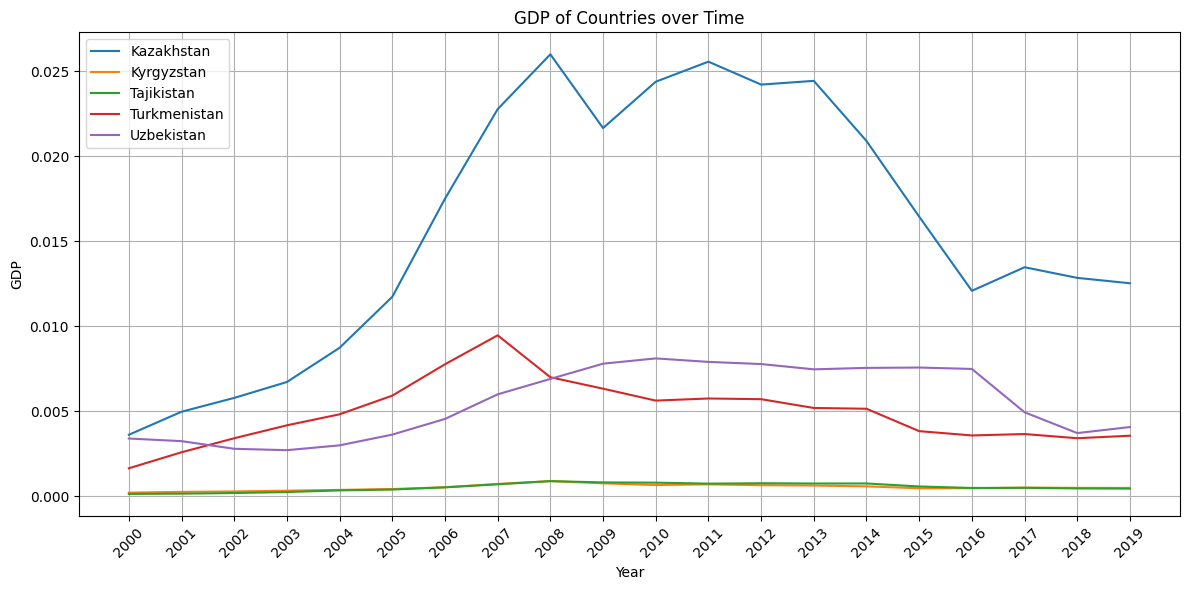

In [ ]:
# Line graph visualization of GDP of Asian countries in Central Asia
proc_df = df2.loc[df2['Region'] == 0].copy()
melted_df = proc_df.drop('Region', axis=1).melt(id_vars='Country', var_name='Year', value_name='GDP')

plt.figure(figsize=(12, 6))

for country in melted_df['Country'].unique():
  country_data = melted_df[melted_df['Country'] == country]
  plt.plot(country_data['Year'], country_data['GDP'], label=country )

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP of Countries over Time')
plt.legend(loc='upper left')
plt.grid('True')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

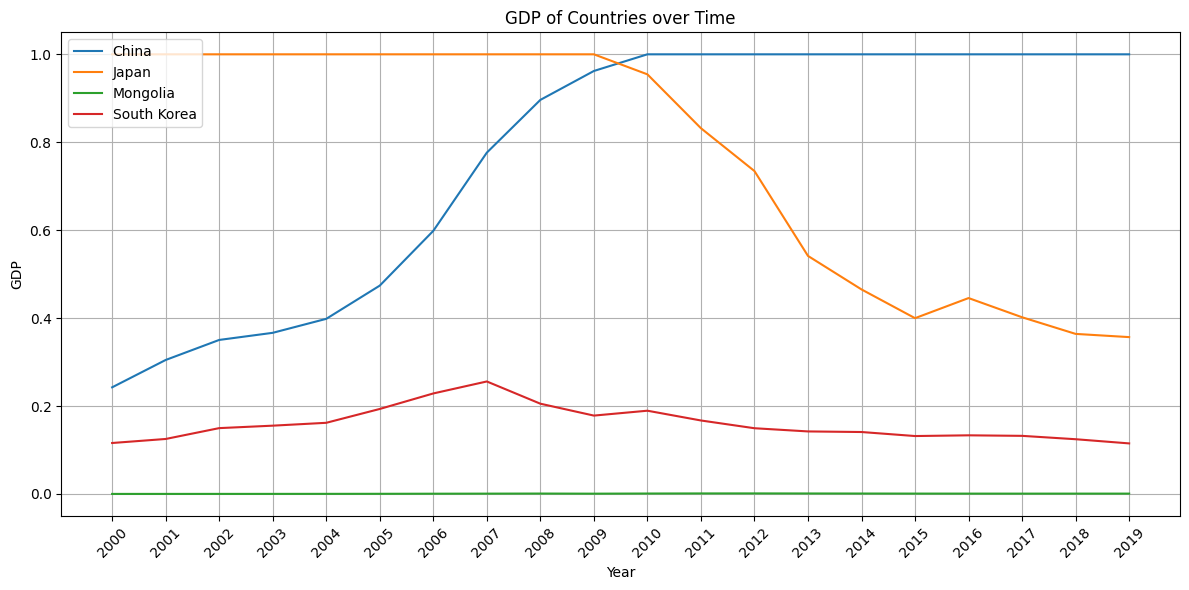

In [ ]:
# Line graph visualization of GDP of Asian countries in East Asia
proc_df = df2.loc[df2['Region'] == 1].copy()
melted_df = proc_df.drop('Region', axis=1).melt(id_vars='Country', var_name='Year', value_name='GDP')

plt.figure(figsize=(12, 6))

for country in melted_df['Country'].unique():
  country_data = melted_df[melted_df['Country'] == country]
  plt.plot(country_data['Year'], country_data['GDP'], label=country )

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP of Countries over Time')
plt.legend(loc='upper left')
plt.grid('True')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

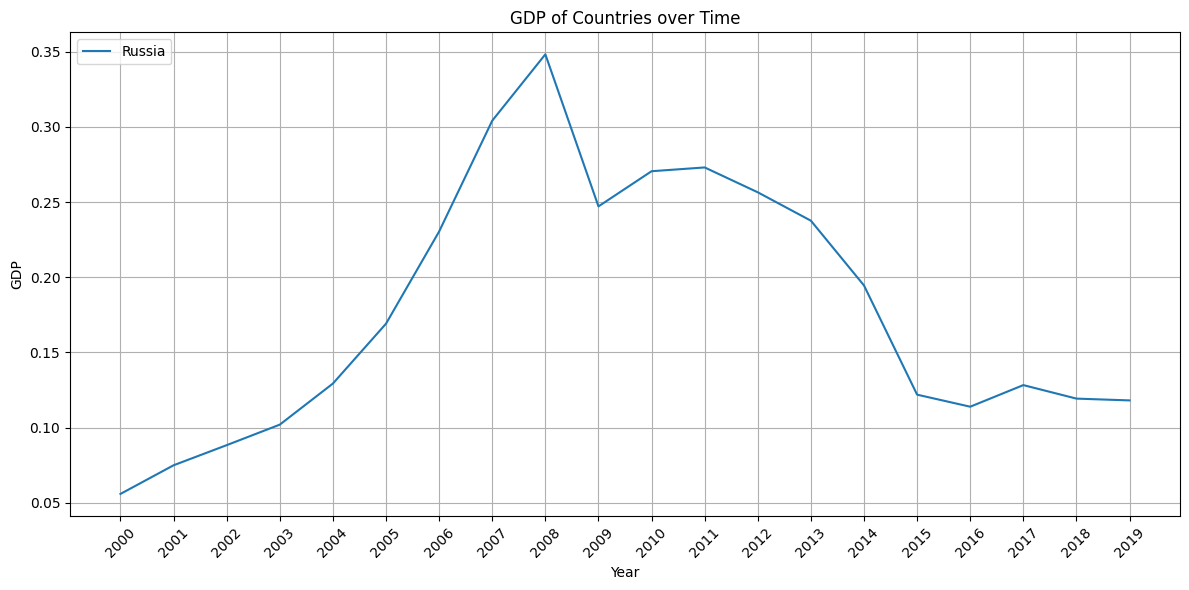

In [ ]:
# Line graph visualization of GDP of Asian countries in North Asia
proc_df = df2.loc[df2['Region'] == 2].copy()
melted_df = proc_df.drop('Region', axis=1).melt(id_vars='Country', var_name='Year', value_name='GDP')

plt.figure(figsize=(12, 6))

for country in melted_df['Country'].unique():
  country_data = melted_df[melted_df['Country'] == country]
  plt.plot(country_data['Year'], country_data['GDP'], label=country )

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP of Countries over Time')
plt.legend(loc='upper left')
plt.grid('True')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

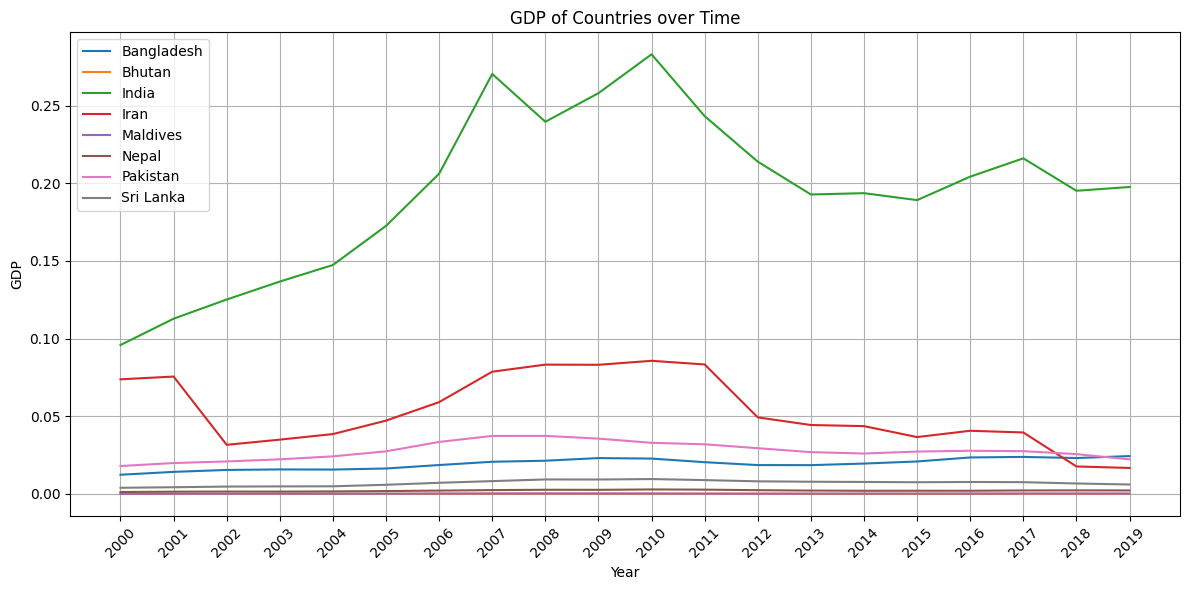

In [ ]:
# Line graph visualization of GDP of Asian countries in South Asia
proc_df = df2.loc[df2['Region'] == 3].copy()
melted_df = proc_df.drop('Region', axis=1).melt(id_vars='Country', var_name='Year', value_name='GDP')

plt.figure(figsize=(12, 6))

for country in melted_df['Country'].unique():
  country_data = melted_df[melted_df['Country'] == country]
  plt.plot(country_data['Year'], country_data['GDP'], label=country )

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP of Countries over Time')
plt.legend(loc='upper left')
plt.grid('True')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

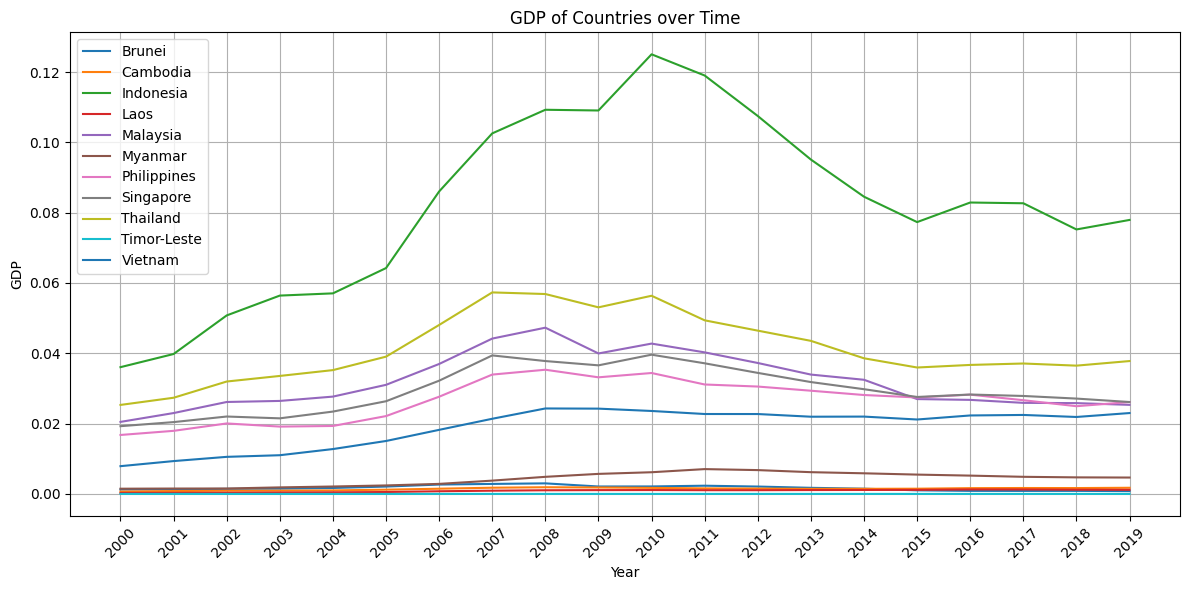

In [ ]:
# Line graph visualization of GDP of Asian countries in Southeast Asia
proc_df = df2.loc[df2['Region'] == 4].copy()
melted_df = proc_df.drop('Region', axis=1).melt(id_vars='Country', var_name='Year', value_name='GDP')

plt.figure(figsize=(12, 6))

for country in melted_df['Country'].unique():
  country_data = melted_df[melted_df['Country'] == country]
  plt.plot(country_data['Year'], country_data['GDP'], label=country )

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP of Countries over Time')
plt.legend(loc='upper left')
plt.grid('True')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

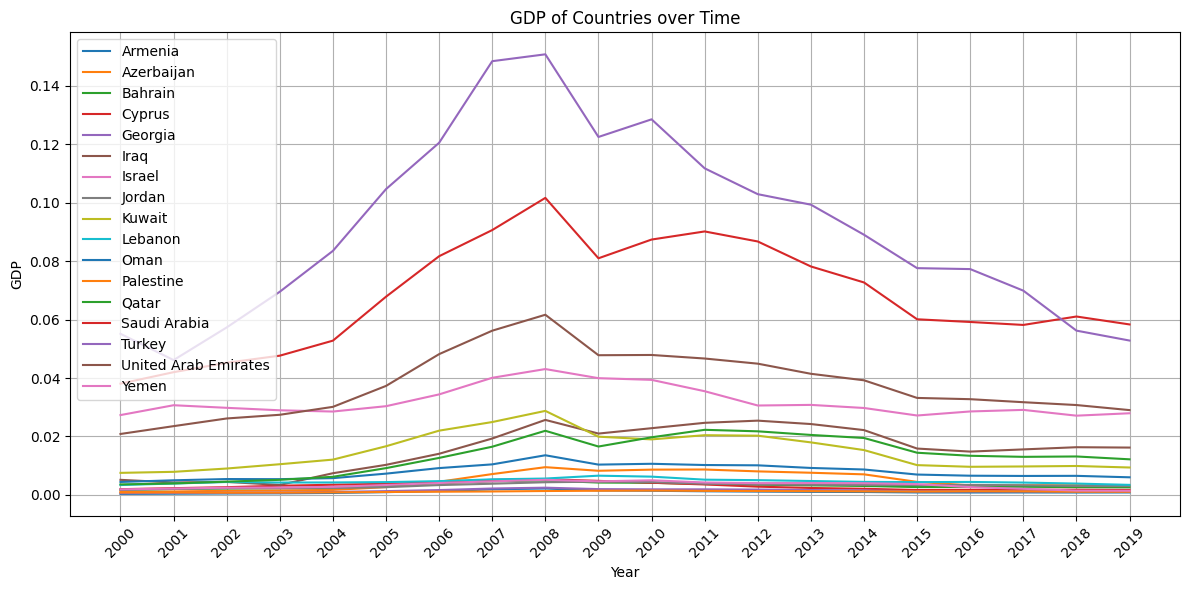

In [ ]:
# Line graph visualization of GDP of Asian countries in West Asia
proc_df = df2.loc[df2['Region'] == 5].copy()
melted_df = proc_df.drop('Region', axis=1).melt(id_vars='Country', var_name='Year', value_name='GDP')

plt.figure(figsize=(12, 6))

for country in melted_df['Country'].unique():
  country_data = melted_df[melted_df['Country'] == country]
  plt.plot(country_data['Year'], country_data['GDP'], label=country )

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP of Countries over Time')
plt.legend(loc='upper left')
plt.grid('True')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show

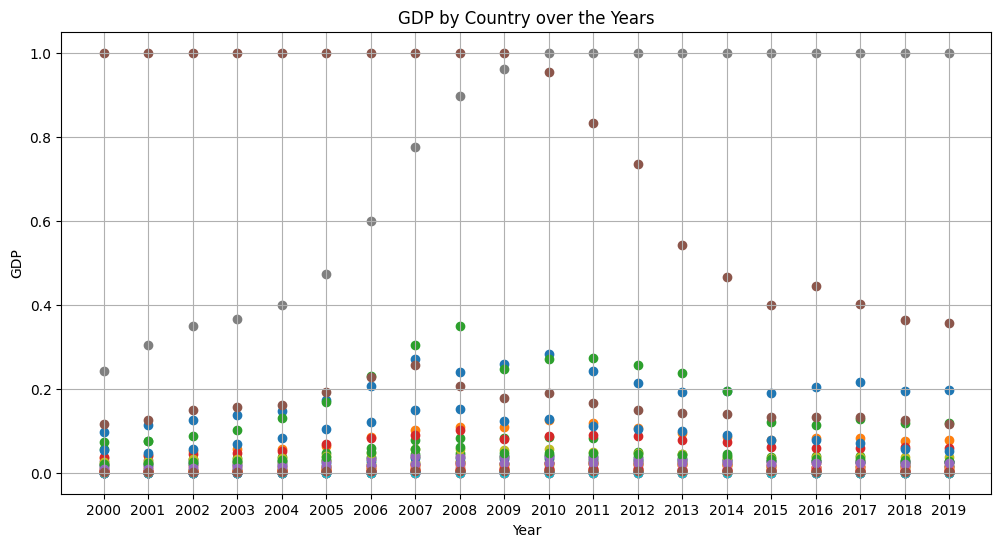

In [ ]:
# Scatterplot visualization of GDP of Asian countries
melted_df = df2.drop('Region', axis=1).melt(id_vars='Country', var_name='Year', value_name='GDP')

plt.figure(figsize=(12, 6))  # Optional: Set the figure size
for country in melted_df['Country'].unique():
    plt.scatter(melted_df[melted_df["Country"] == country]["Year"],
                melted_df[melted_df["Country"] == country]["GDP"],
                label=country)

plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP by Country over the Years")
plt.grid(True)
plt.show()


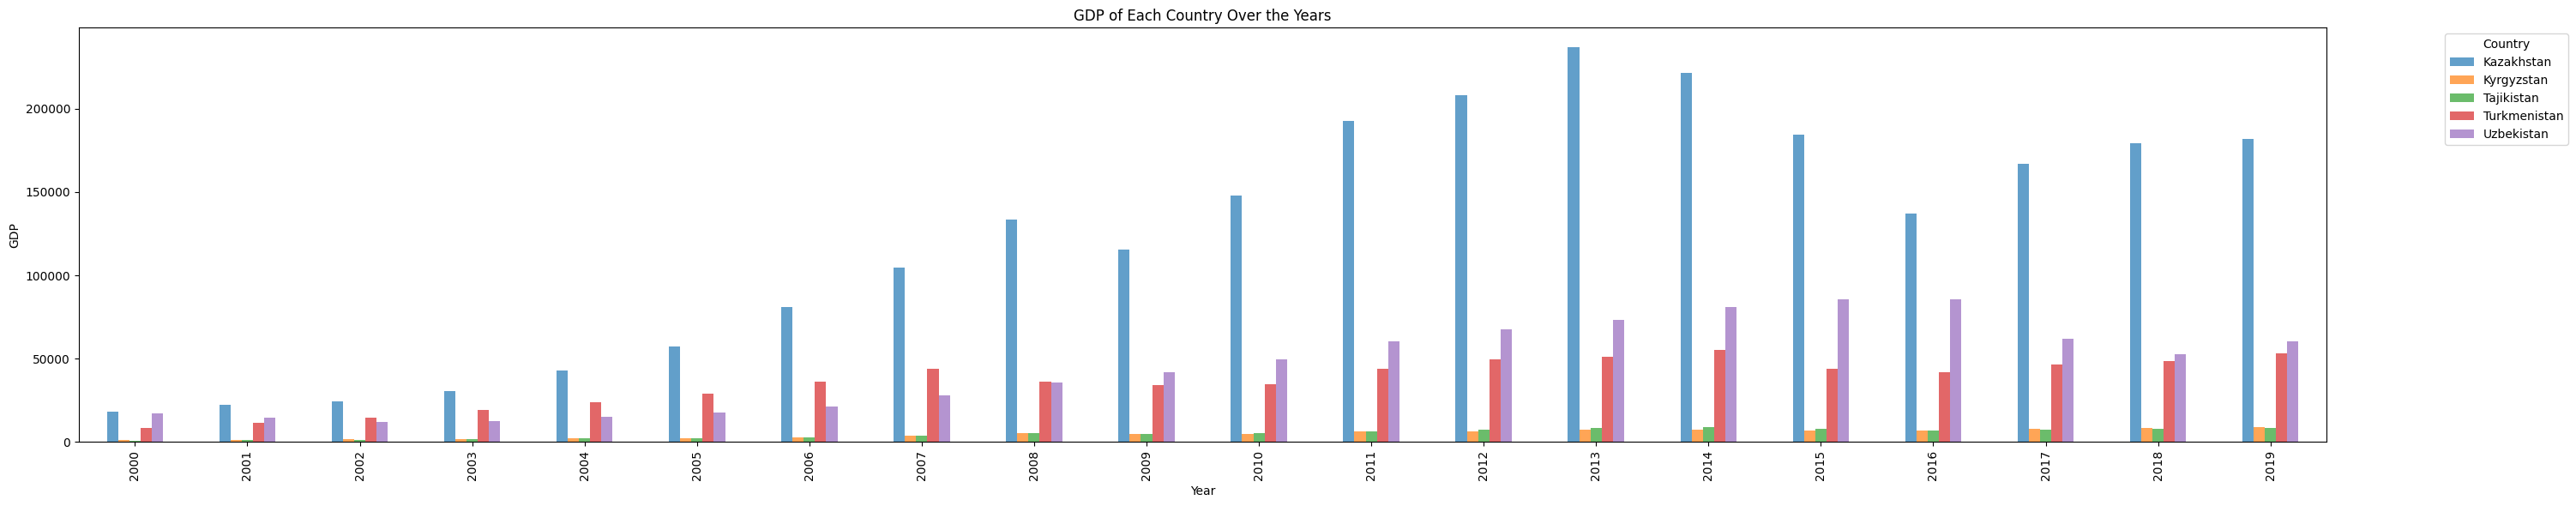

In [ ]:
# Histogram visualization of GDP of Asian countries in Central Asia
proc_df = df.loc[df2['Region'] == 0].copy().drop('Region', axis=1)
df_transposed = proc_df.set_index('Country').T

df_transposed.plot(kind='bar', alpha=0.7, figsize=(30, 6))

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP of Each Country Over the Years')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

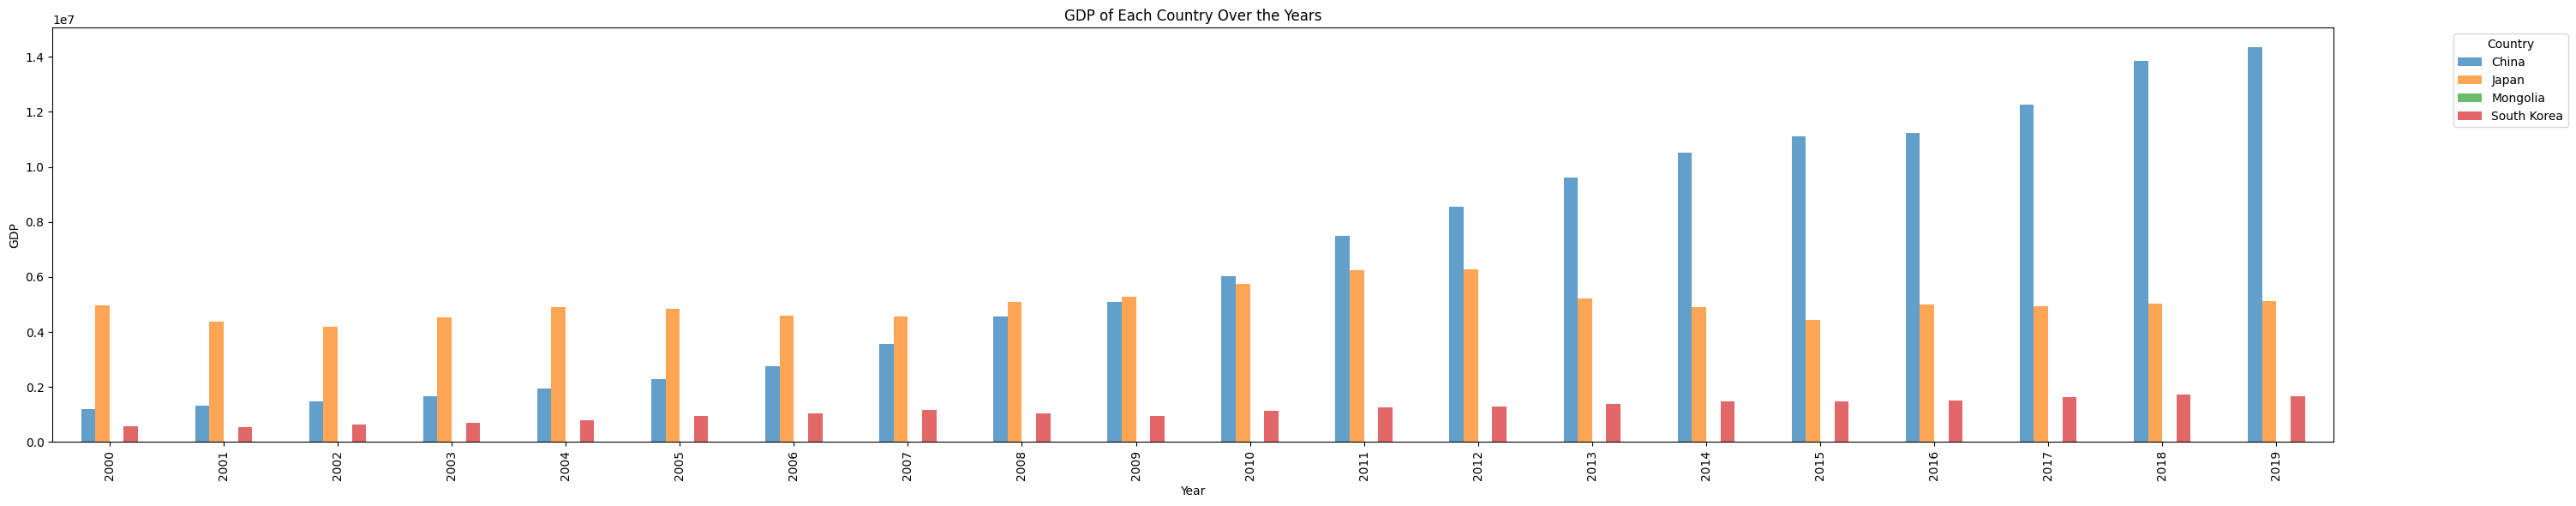

In [ ]:
# Histogram visualization of GDP of Asian countries in East Asia
proc_df = df.loc[df2['Region'] == 1].copy().drop('Region', axis=1)
df_transposed = proc_df.set_index('Country').T

df_transposed.plot(kind='bar', alpha=0.7, figsize=(30, 6))

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP of Each Country Over the Years')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

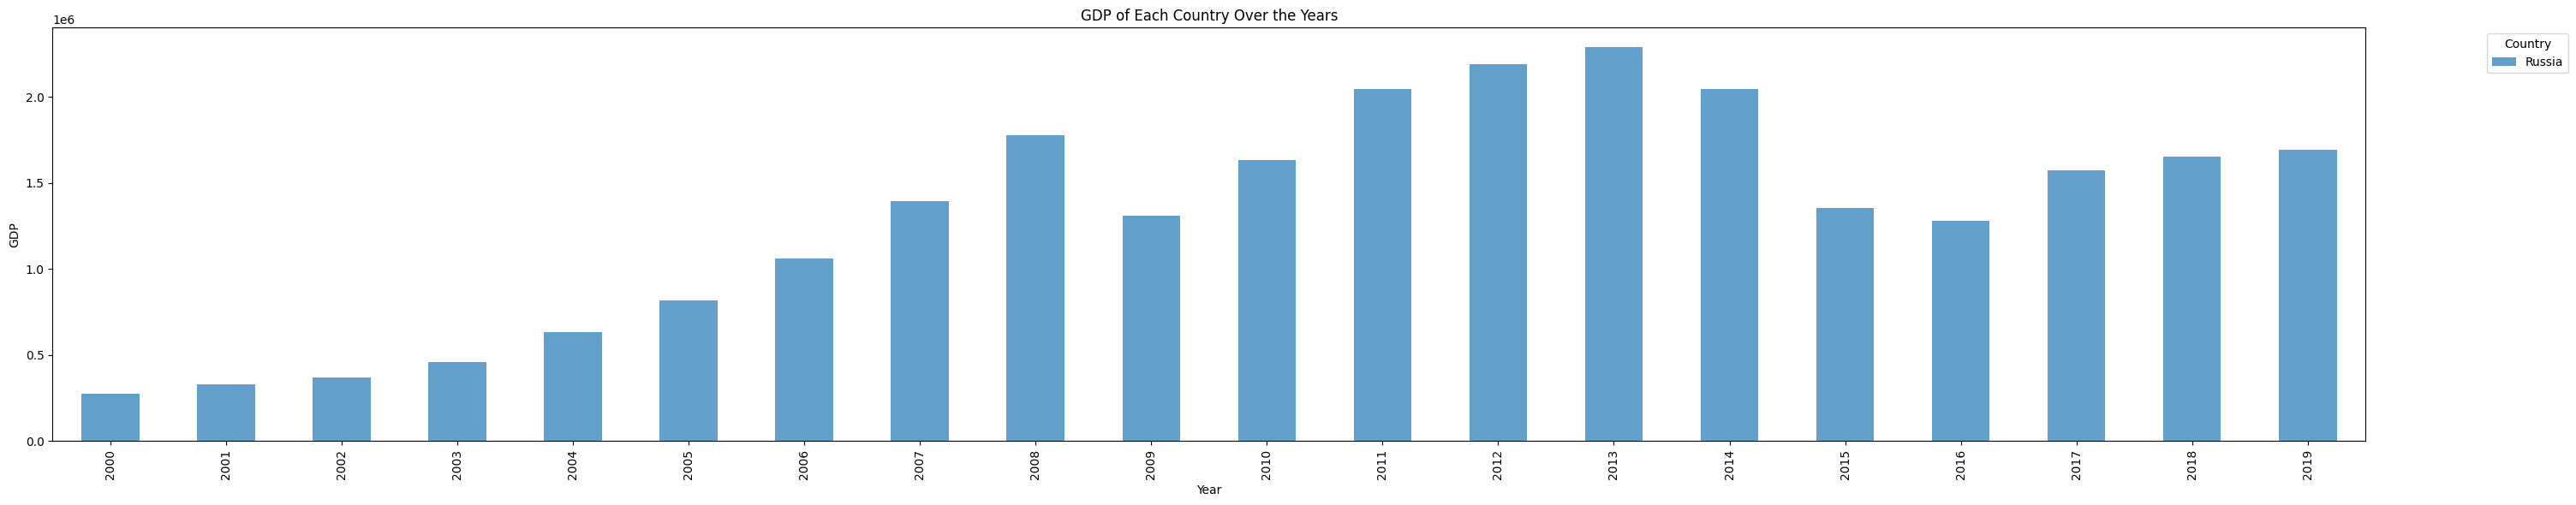

In [ ]:
# Histogram visualization of GDP of Asian countries in North Asia
proc_df = df.loc[df2['Region'] == 2].copy().drop('Region', axis=1)
df_transposed = proc_df.set_index('Country').T

df_transposed.plot(kind='bar', alpha=0.7, figsize=(30, 6))

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP of Each Country Over the Years')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

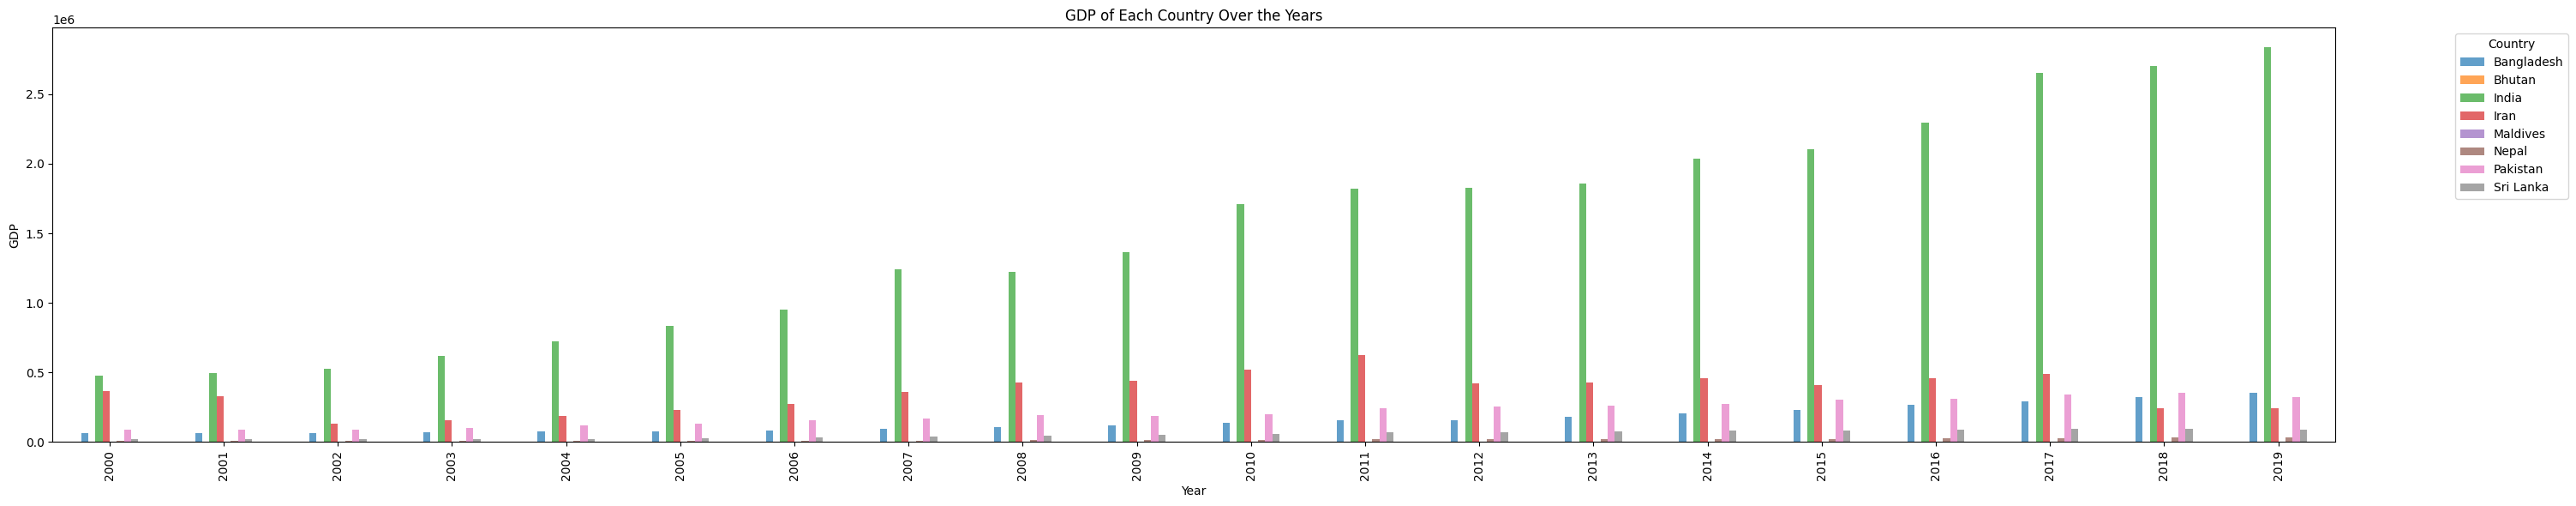

In [ ]:
# Histogram visualization of GDP of Asian countries in South Asia
proc_df = df.loc[df2['Region'] == 3].copy().drop('Region', axis=1)
df_transposed = proc_df.set_index('Country').T

df_transposed.plot(kind='bar', alpha=0.7, figsize=(30, 6))

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP of Each Country Over the Years')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

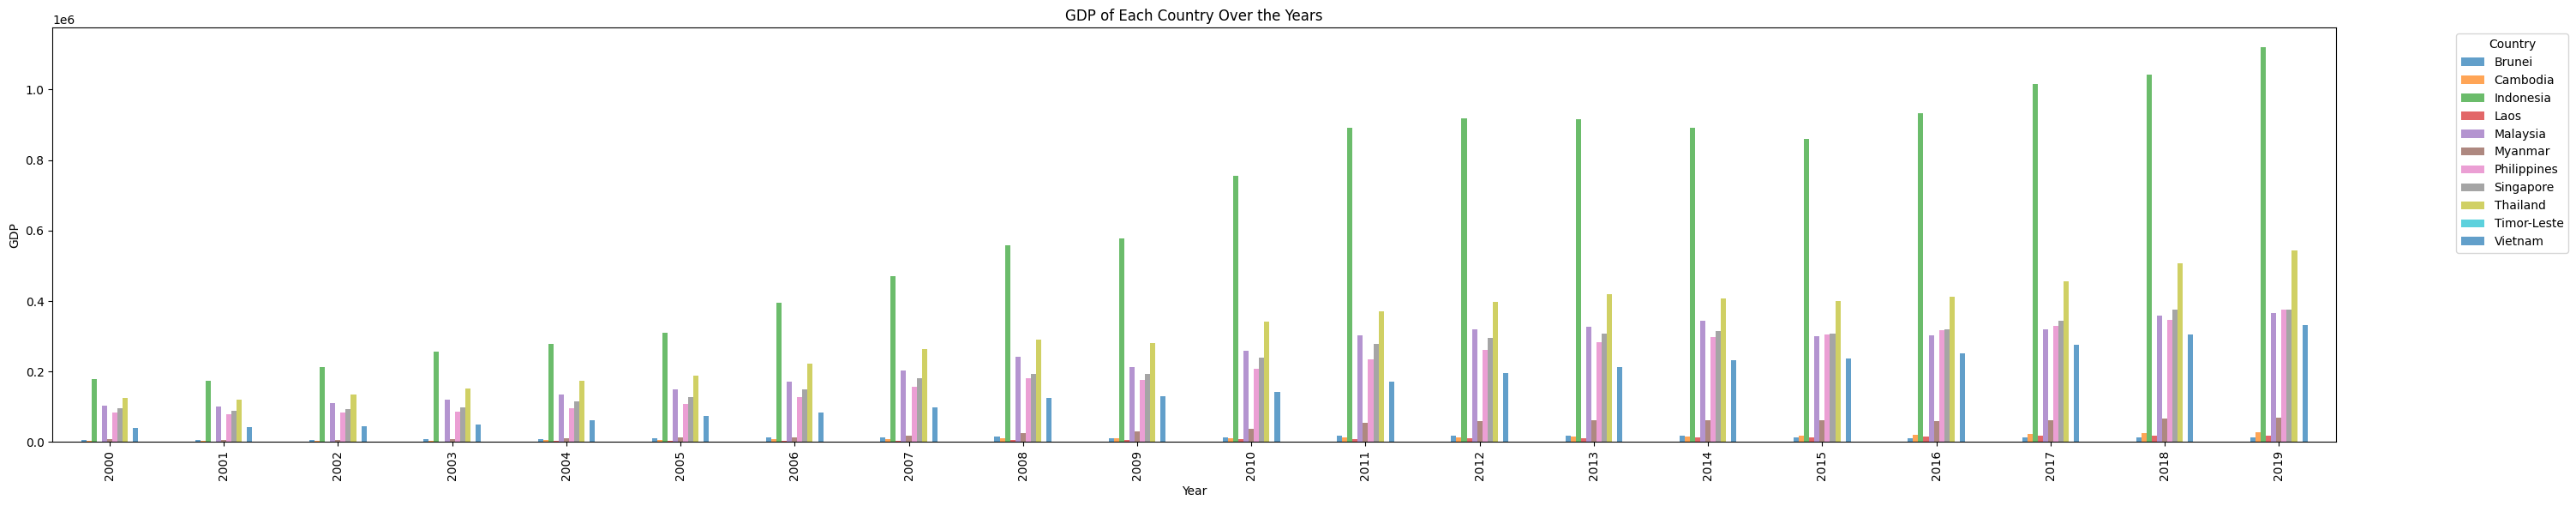

In [ ]:
# Histogram visualization of GDP of Asian countries in Southeast Asia
proc_df = df.loc[df2['Region'] == 4].copy().drop('Region', axis=1)
df_transposed = proc_df.set_index('Country').T

df_transposed.plot(kind='bar', alpha=0.7, figsize=(30, 6))

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP of Each Country Over the Years')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

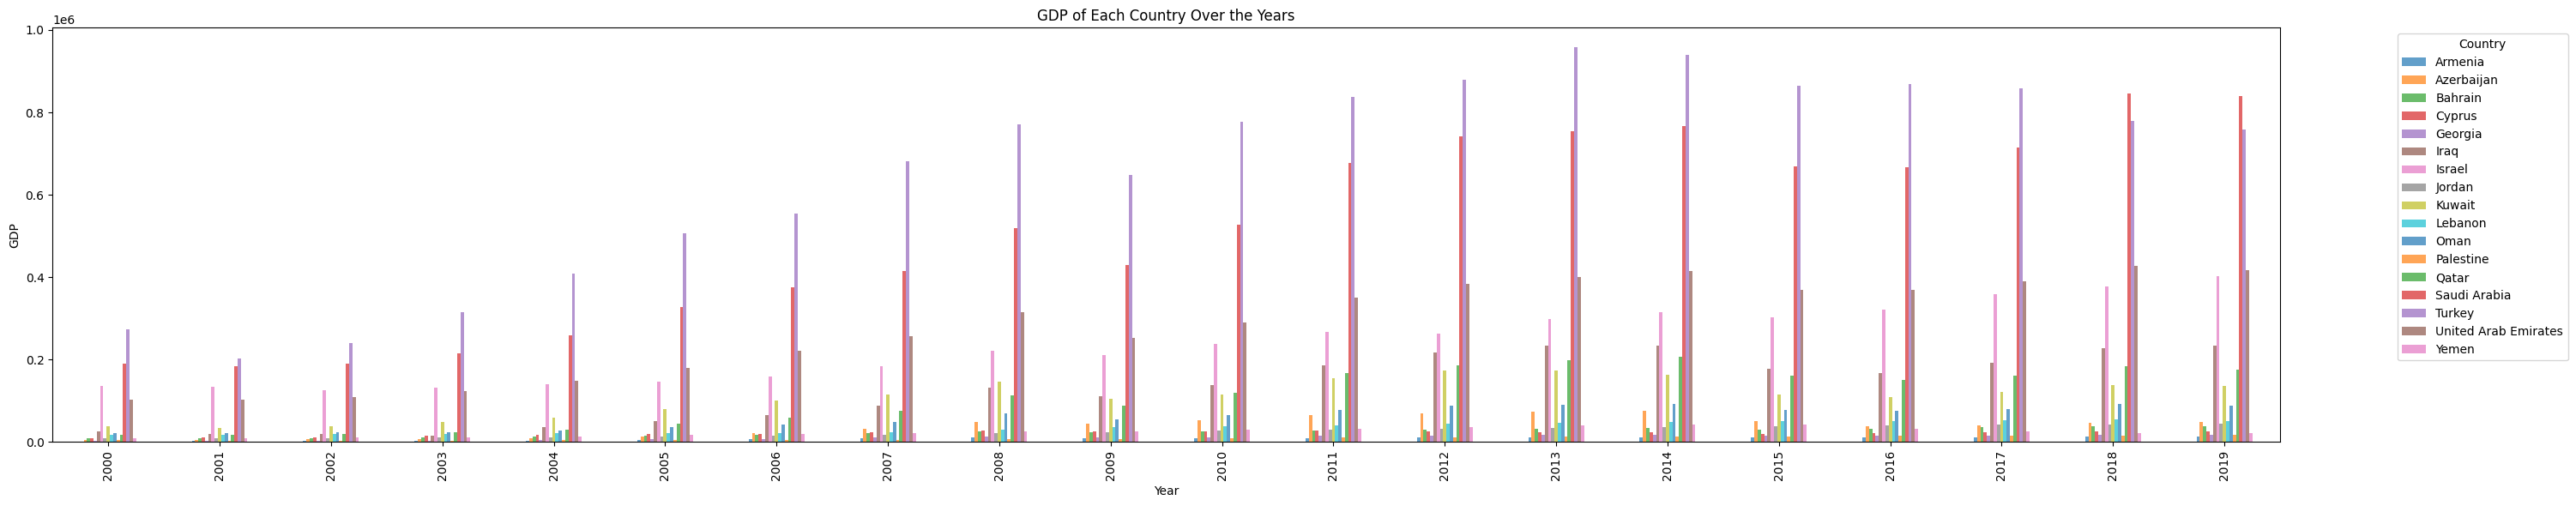

In [ ]:
# Histogram visualization of GDP of Asian countries in West Asia
proc_df = df.loc[df2['Region'] == 5].copy().drop('Region', axis=1)
df_transposed = proc_df.set_index('Country').T

df_transposed.plot(kind='bar', alpha=0.7, figsize=(30, 6))

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP of Each Country Over the Years')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

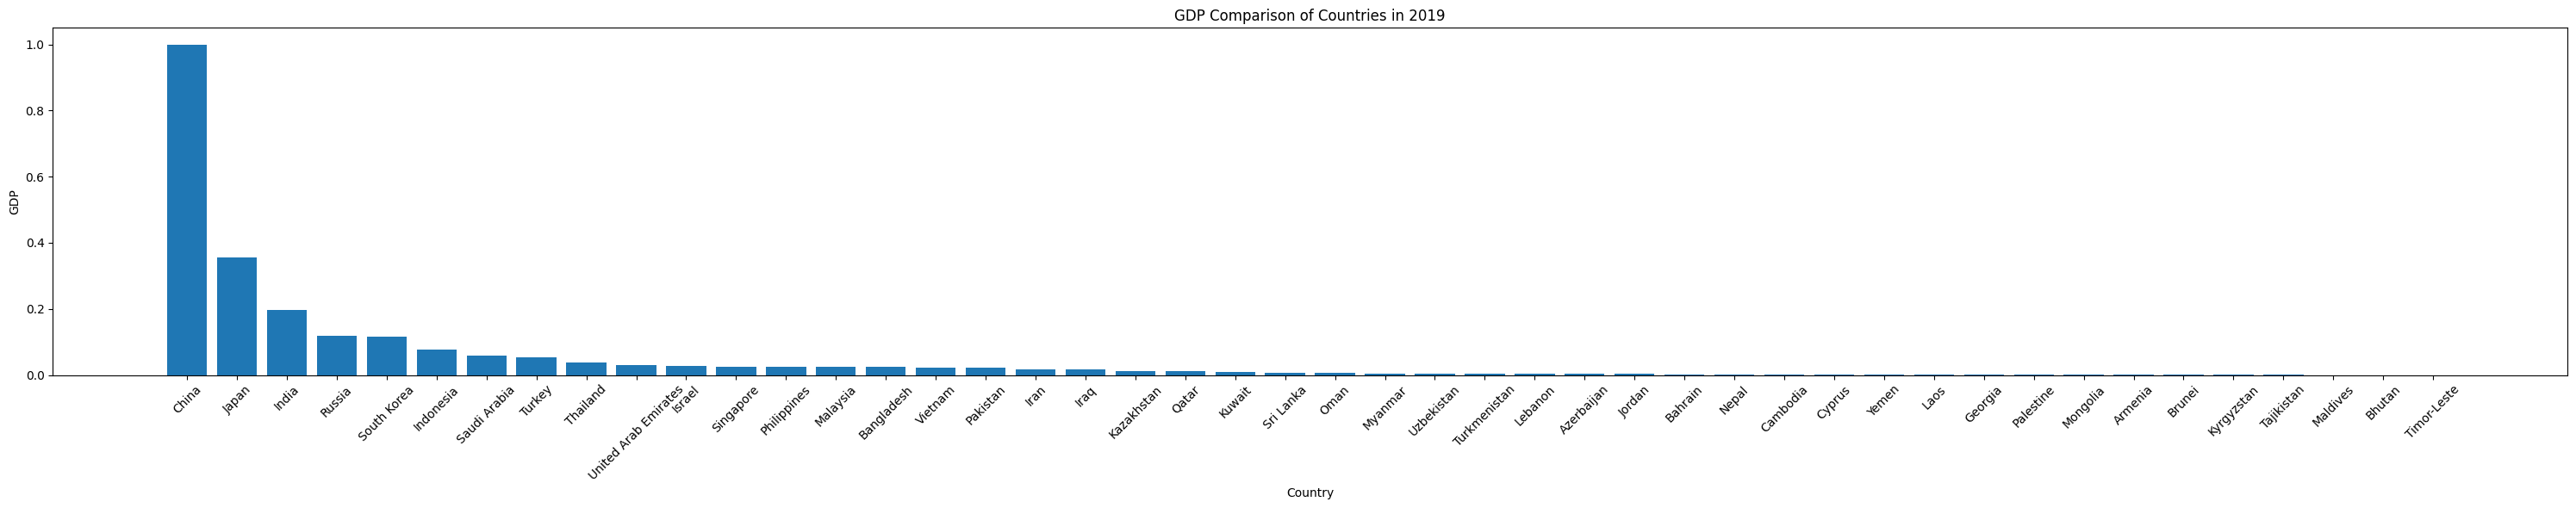

In [ ]:
# Bar graph visualization of GDP of Asian countries in year 2019
year = '2019'
gdp_comparison = df2[['Country', year]].copy()

gdp_comparison.sort_values(by=year, ascending=False, inplace=True)

plt.figure(figsize=(30, 6))
plt.bar(gdp_comparison['Country'], gdp_comparison[year])

plt.xlabel('Country')
plt.ylabel('GDP')
plt.title(f'GDP Comparison of Countries in {year}')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

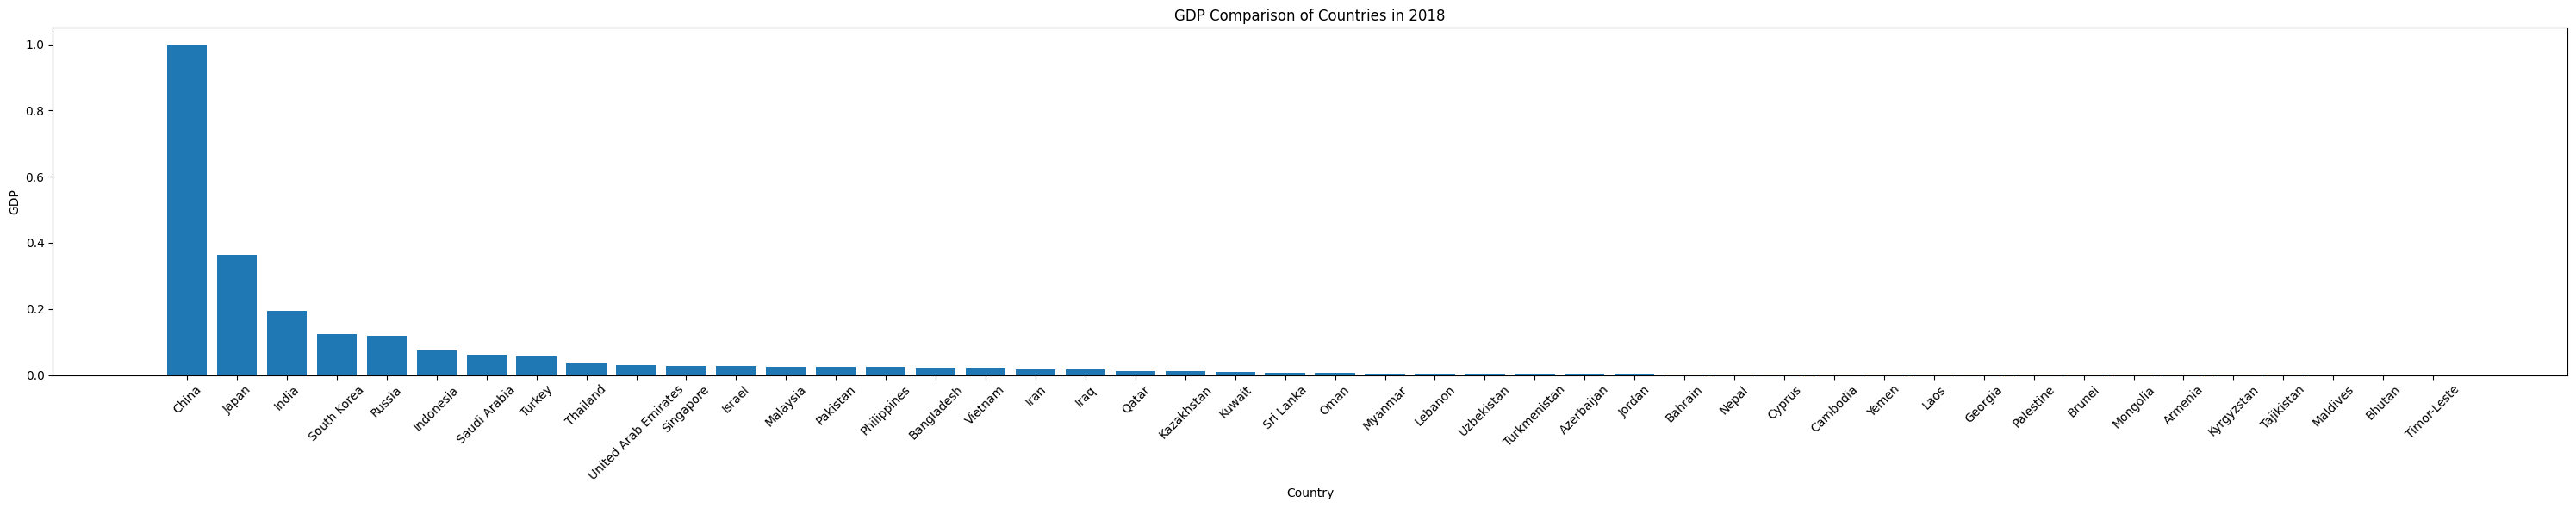

In [ ]:
# Bar graph visualization of GDP of Asian countries in year 2018
year = '2018'
gdp_comparison = df2[['Country', year]].copy()

gdp_comparison.sort_values(by=year, ascending=False, inplace=True)

plt.figure(figsize=(30, 6))
plt.bar(gdp_comparison['Country'], gdp_comparison[year])

plt.xlabel('Country')
plt.ylabel('GDP')
plt.title(f'GDP Comparison of Countries in {year}')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

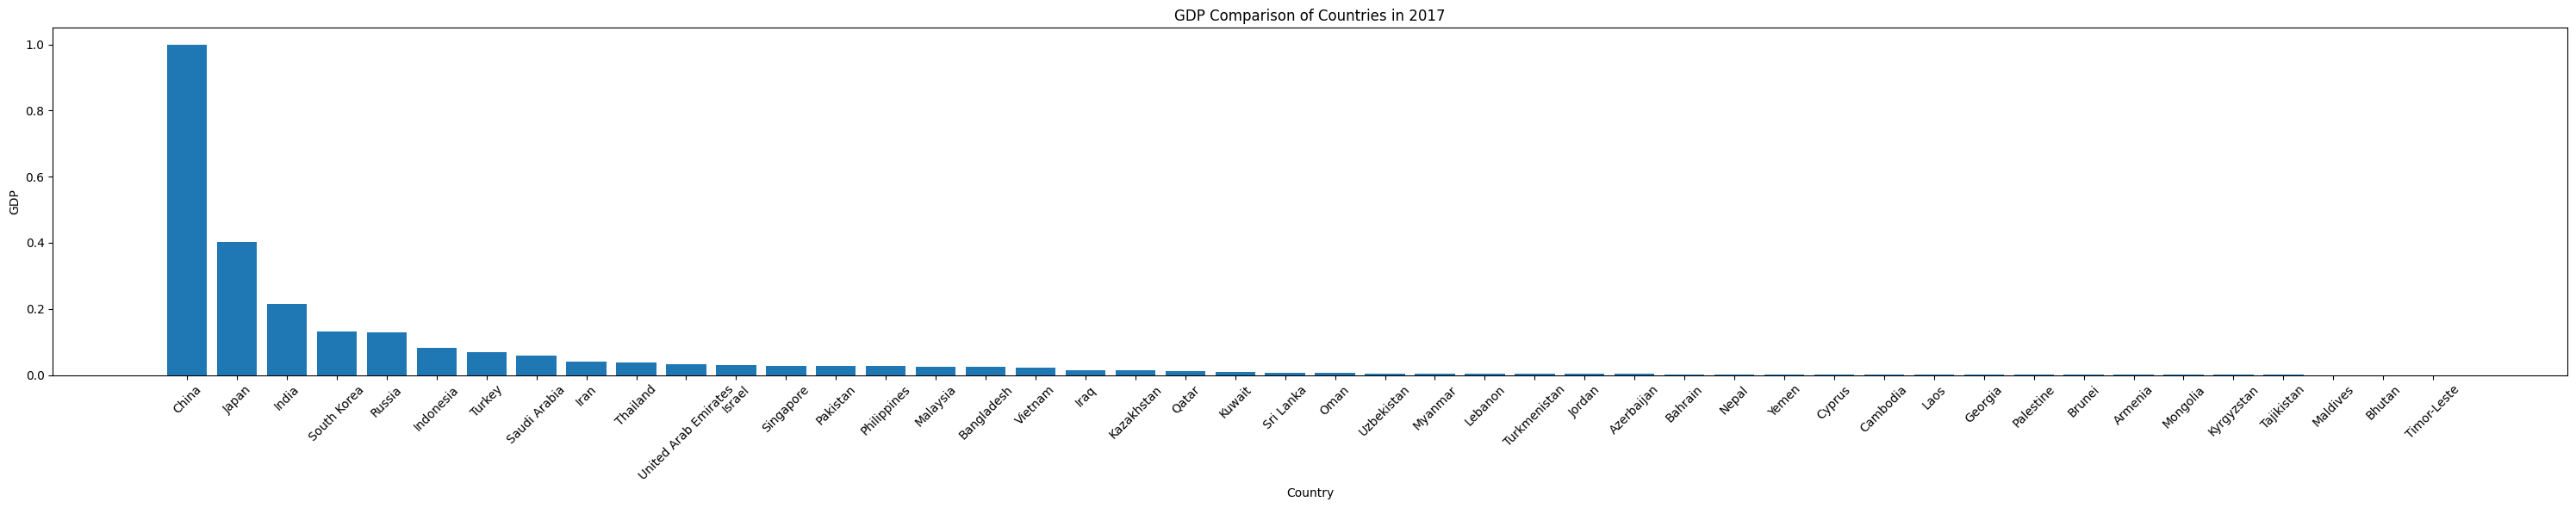

In [ ]:
# Bar graph visualization of GDP of Asian countries in year 2017
year = '2017'
gdp_comparison = df2[['Country', year]].copy()

gdp_comparison.sort_values(by=year, ascending=False, inplace=True)

plt.figure(figsize=(30, 6))
plt.bar(gdp_comparison['Country'], gdp_comparison[year])

plt.xlabel('Country')
plt.ylabel('GDP')
plt.title(f'GDP Comparison of Countries in {year}')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

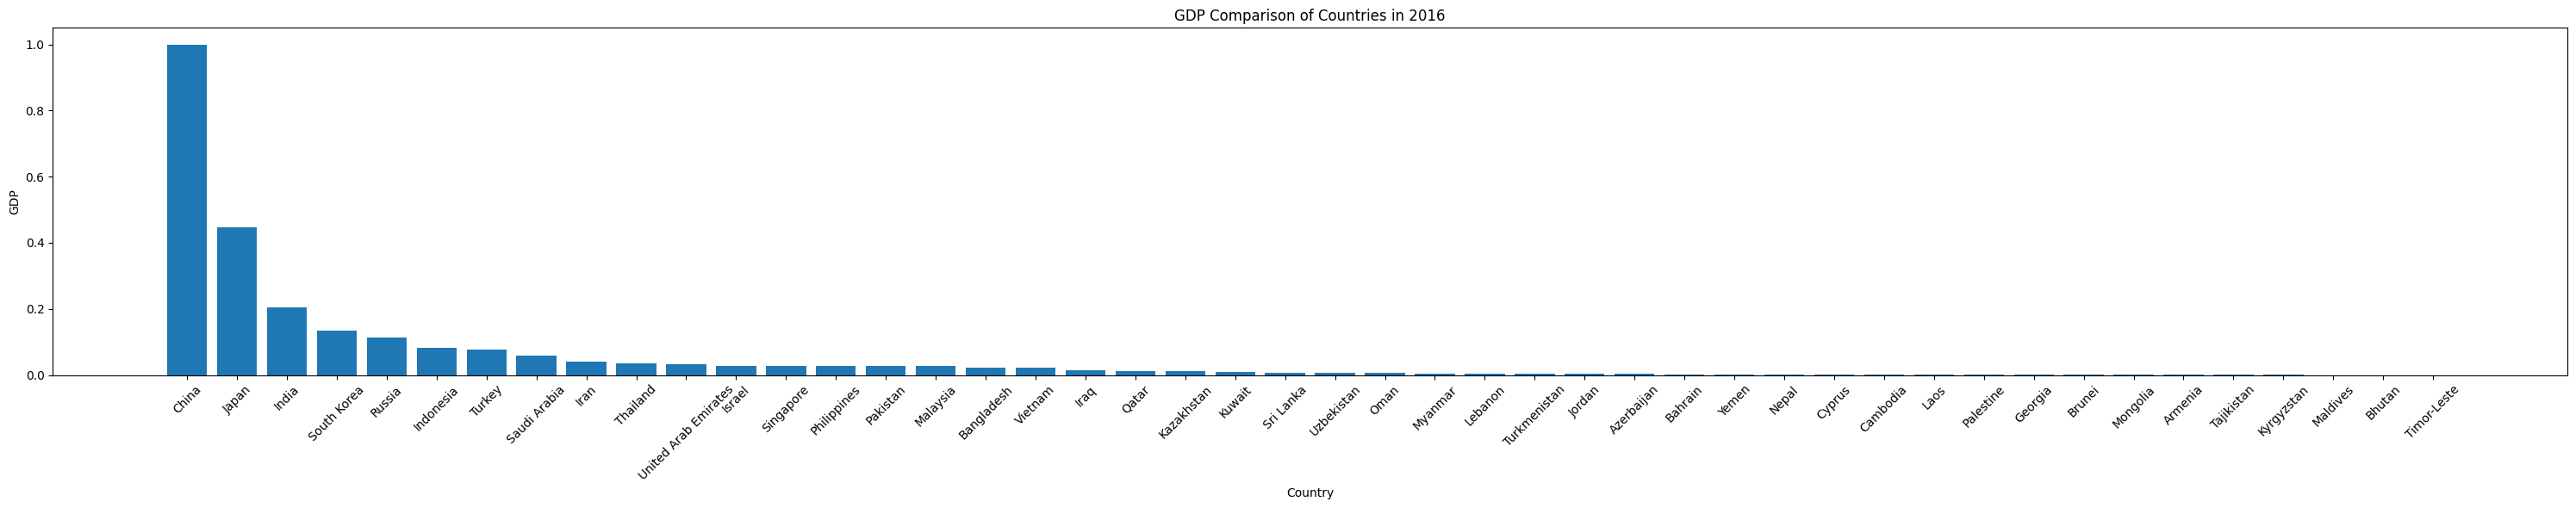

In [ ]:
# Bar graph visualization of GDP of Asian countries in year 2016
year = '2016'
gdp_comparison = df2[['Country', year]].copy()

gdp_comparison.sort_values(by=year, ascending=False, inplace=True)

plt.figure(figsize=(30, 6))
plt.bar(gdp_comparison['Country'], gdp_comparison[year])

plt.xlabel('Country')
plt.ylabel('GDP')
plt.title(f'GDP Comparison of Countries in {year}')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

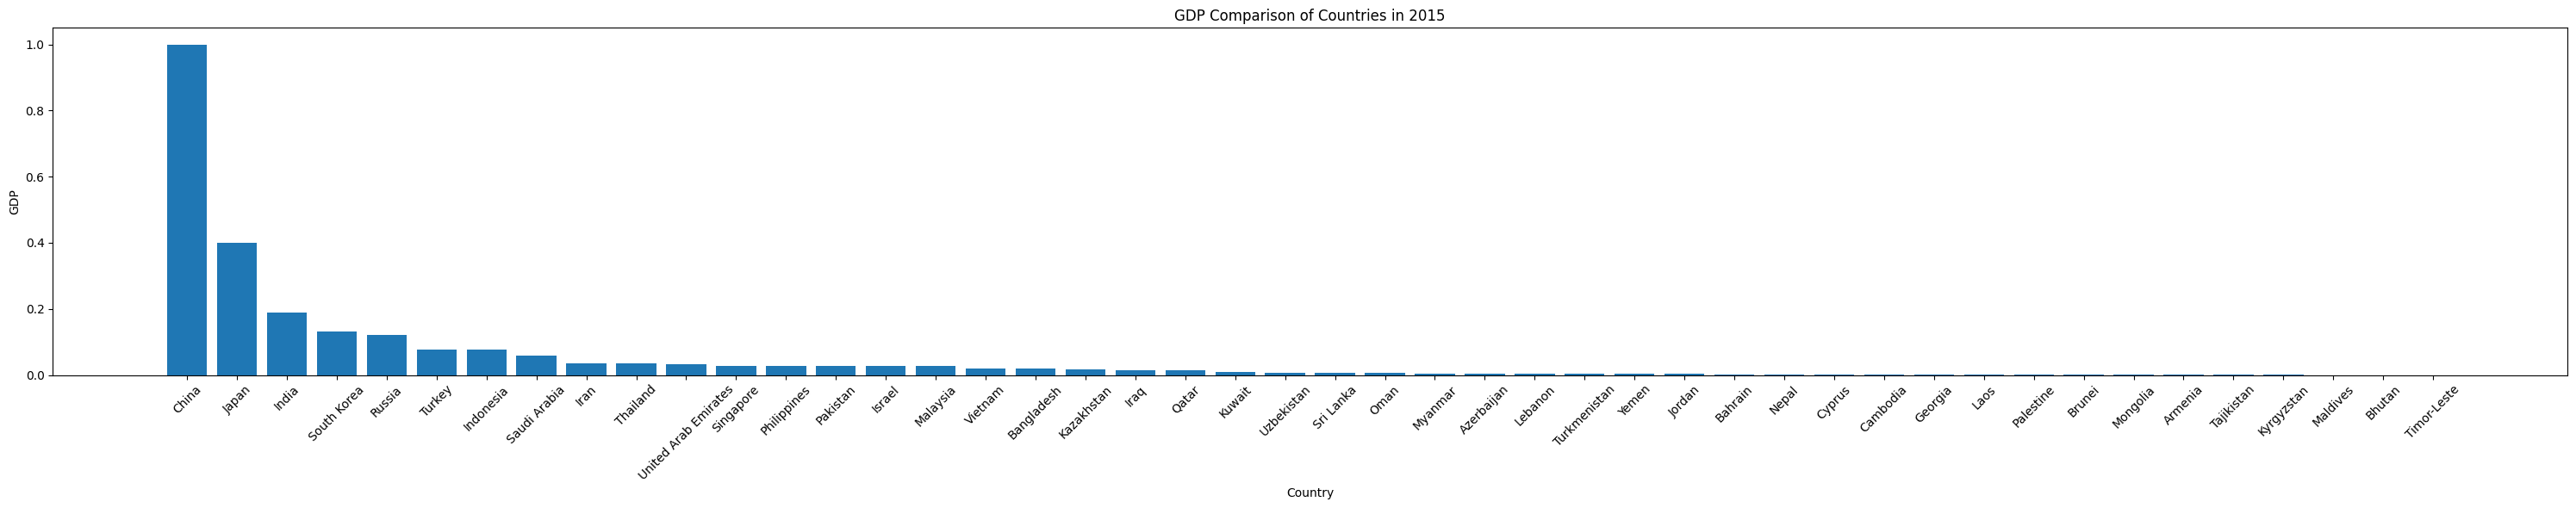

In [ ]:
# Bar graph visualization of GDP of Asian countries in year 2015
year = '2015'
gdp_comparison = df2[['Country', year]].copy()

gdp_comparison.sort_values(by=year, ascending=False, inplace=True)

plt.figure(figsize=(30, 6))
plt.bar(gdp_comparison['Country'], gdp_comparison[year])

plt.xlabel('Country')
plt.ylabel('GDP')
plt.title(f'GDP Comparison of Countries in {year}')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**MODELLING**

In [ ]:
# Use Sklearn Linear Regression model to predict GDP of Asian Countries

# Store feature values in X
X = df2.drop(columns = ['Country','Region','2019'])

# Store values to predict in y
y = df2['2019']

# Split data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instantiate Linear Regression model
model = LinearRegression()

# Fit model with training set
model.fit(X_train, y_train)

# Implement prediction using Linear Regression model and test set
y_pred=model.predict(X_test)

In [ ]:
# Compute for model performance metrics for evaluation
# Mean Squared error
mse = mean_squared_error(y_test, y_pred)
# R-Squared
r2 = r2_score(y_test, y_pred)
# Root Mean Squared Error
rmse = np.sqrt(mse)
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
# Median Absolute Error
medae = median_absolute_error(y_test, y_pred)

print('Mean Squared Error: \n{} or {:.4%}\n'.format(mse,mse))
print('R-Squared Score: \n{} or {:.2%}\n'.format(r2,r2))
print('Root Mean Squared Error: \n{} or {:.2%}\n'.format(rmse,rmse))
print('Mean Absolute Error: \n{} or {:.2%}\n'.format(mae,mae))
print('Median Absolute Error: \n{} or {:.3%}'.format(medae,medae))

Mean Squared Error: 
1.1959551022908659e-05 or 0.0012%

R-Squared Score: 
0.9969489787044268 or 99.69%

Root Mean Squared Error: 
0.0034582583800098943 or 0.35%

Mean Absolute Error: 
0.002103940193521228 or 0.21%

Median Absolute Error: 
0.00041725886739910935 or 0.042%
